In [1]:
import pandas as pd 
import altair as alt
import seaborn as sns
import scipy.stats

In [2]:
chicago_data = 'https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/Traffic_Crashes1.csv'

In [3]:
df_chicago = pd.read_csv(chicago_data)
df_chicago.head()

,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,date_real
0,290702,9e97e92753166de921a0e87199513aa841142c6fbb3a1e...,JA154528,NaN,2017-02-14 10:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,...,0.0,1.0,0.0,10,3,2,42.001676,-87.666364,POINT (-87.666364005301 42.001675862416),2017-02-14
1,405524,e5fe82ab7757d630a7f79927113bc63b5bede0cda74665...,JC391213,NaN,2019-08-13 19:12:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,...,0.0,8.0,0.0,19,3,8,41.940041,-87.650923,POINT (-87.650923222567 41.940040917032),2019-08-13
2,261834,8c8ea6db9e1950765419429e2732ba5598fc6f87ac9e0c...,JC273287,NaN,2019-05-22 08:30:00,25,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,...,0.0,2.0,0.0,8,4,5,41.955854,-87.710645,POINT (-87.710644534923 41.955853610383),2019-05-22
3,38519,02671b7d36a9d189d607778816fec23bbb2e5ac3cd3039...,JA307115,NaN,2017-06-14 16:50:00,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,0.0,2.0,0.0,16,4,6,41.863734,-87.676313,POINT (-87.676312689993 41.863734390899),2017-06-14
4,420197,ef1b1d450f65c6d16245dffdd3304d93b8be7d7bbf47f3...,JB247942,NaN,2018-05-03 08:35:00,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,...,0.0,2.0,0.0,8,5,5,41.851794,-87.695223,POINT (-87.695223114296 41.851794251516),2018-05-03


In [9]:
df_chicago.dtypes

Unnamed: 0                                     int64
CRASH_RECORD_ID                               object
RD_NO                                         object
CRASH_DATE_EST_I                              object
CRASH_DATE                       datetime64[ns, UTC]
POSTED_SPEED_LIMIT                             int64
TRAFFIC_CONTROL_DEVICE                        object
DEVICE_CONDITION                              object
WEATHER_CONDITION                             object
LIGHTING_CONDITION                            object
FIRST_CRASH_TYPE                              object
TRAFFICWAY_TYPE                               object
LANE_CNT                                     float64
ALIGNMENT                                     object
ROADWAY_SURFACE_COND                          object
ROAD_DEFECT                                   object
REPORT_TYPE                                   object
CRASH_TYPE                                    object
INTERSECTION_RELATED_I                        

In [4]:
df_chicago['CRASH_DATE']=pd.to_datetime(df_chicago['CRASH_DATE'],errors='coerce',utc=True)

In [13]:
report = df_chicago.groupby(['LIGHTING_CONDITION','REPORT_TYPE','CRASH_HOUR']).agg({'NUM_UNITS':'sum'}).reset_index()

In [15]:
report.head()

,LIGHTING_CONDITION,REPORT_TYPE,CRASH_HOUR,NUM_UNITS
0,DARKNESS,AMENDED,20,2
1,DARKNESS,NOT ON SCENE (DESK REPORT),0,97
2,DARKNESS,NOT ON SCENE (DESK REPORT),1,86
3,DARKNESS,NOT ON SCENE (DESK REPORT),2,64
4,DARKNESS,NOT ON SCENE (DESK REPORT),3,57


In [28]:
alt.Chart(report).mark_bar().encode(
    x='LIGHTING_CONDITION',
    y='NUM_UNITS',
    color='REPORT_TYPE'
).properties(width=600,height=450)

alt.Chart(...)

In [32]:
alt.Chart(report).mark_bar().encode(
    x = 'CRASH_HOUR',
    y = 'NUM_UNITS',
    color = 'LIGHTING_CONDITION'
).properties(width=500)

alt.Chart(...)

In [33]:
df_chicago['LIGHTING_CONDITION'].uniqueque()

array(['DAYLIGHT', 'UNKNOWN', 'DARKNESS, LIGHTED ROAD', 'DUSK',
       'DARKNESS', 'DAWN'], dtype=object)

In [56]:
df_chicago.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [62]:
test = df_chicago.corr().unstack().reset_index().sort_values(by=[0])

In [64]:
test.columns = ['a','b','c']

In [74]:
test[(test['c']  > 0.3) & (test['c'] < 1.0 )]

,a,b,c
116,INJURIES_TOTAL,INJURIES_INCAPACITATING,0.332512
150,INJURIES_INCAPACITATING,INJURIES_TOTAL,0.332512
118,INJURIES_TOTAL,INJURIES_REPORTED_NOT_EVIDENT,0.588038
186,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_TOTAL,0.588038
117,INJURIES_TOTAL,INJURIES_NON_INCAPACITATING,0.762338
168,INJURIES_NON_INCAPACITATING,INJURIES_TOTAL,0.762338


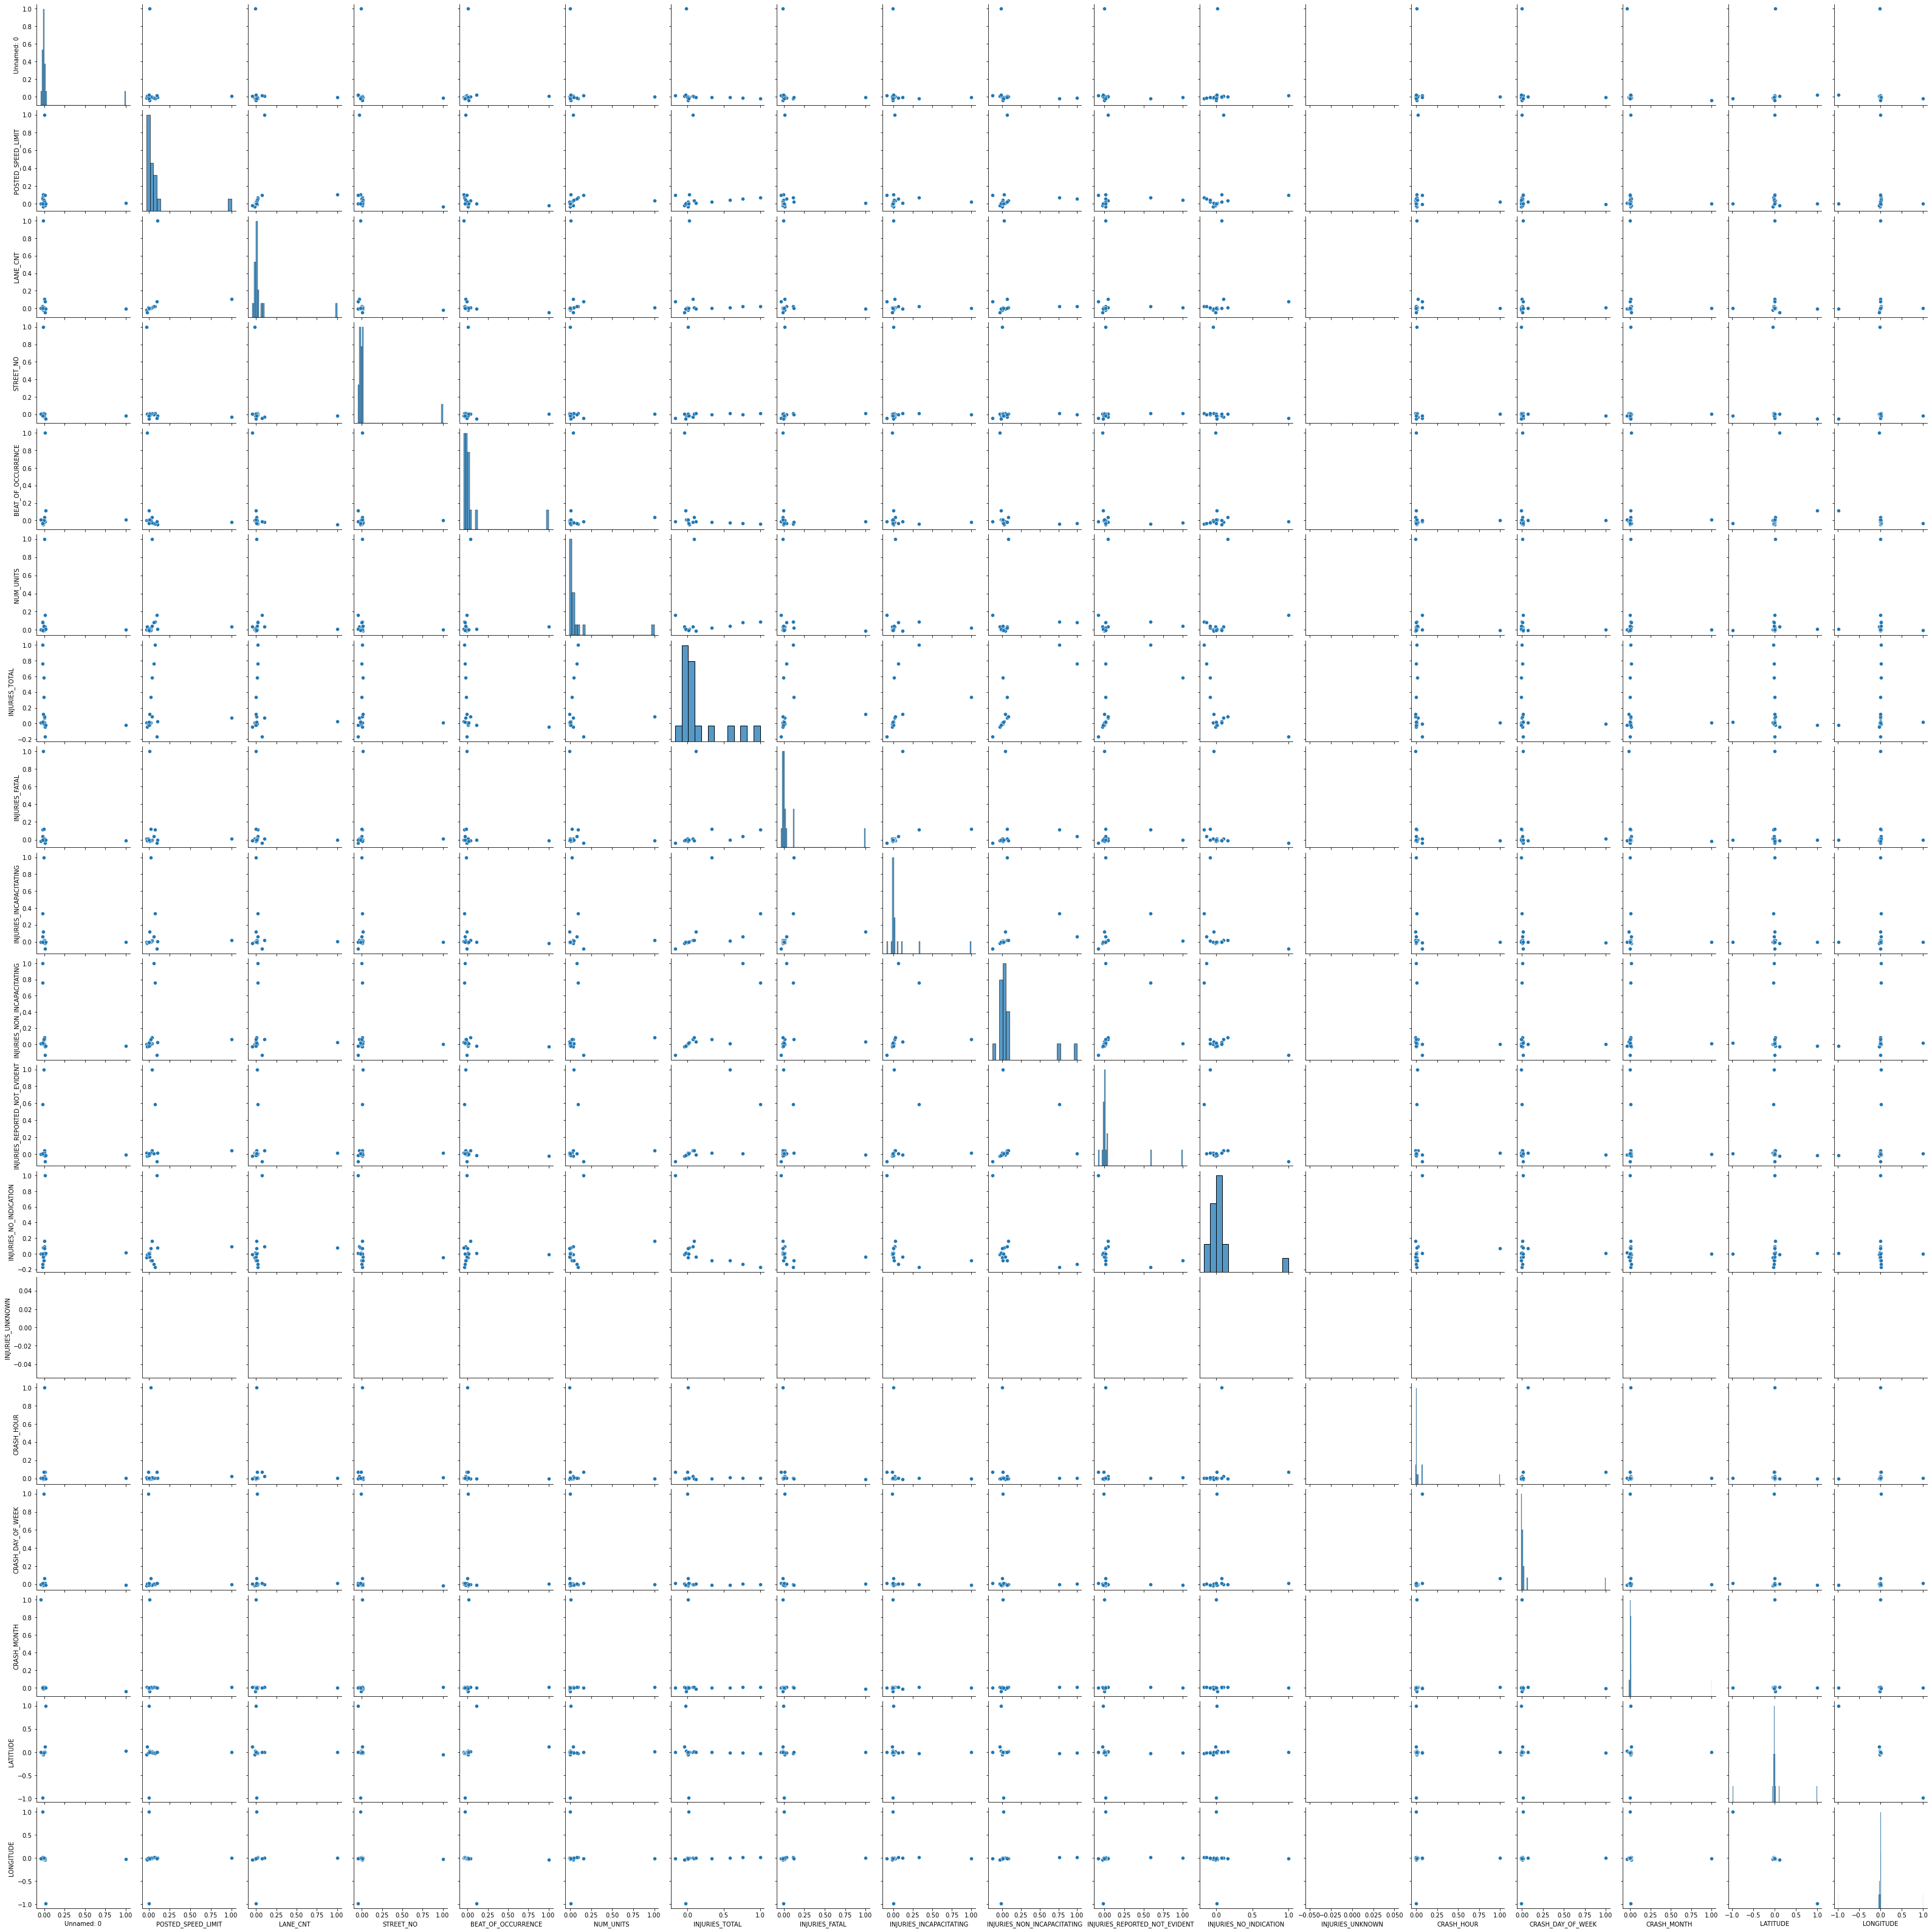

In [79]:
sns.pairplot(df_chicago.corr())